# Loan_Prediction

In [15]:
import pandas as pd
import numpy as np 

In [16]:
train_df = pd.read_csv("E:\\Data Science\\Analytics Vidhya Datasets\\Loan_train.csv")
train_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Processing

In [17]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [18]:
train_df.shape

(614, 13)

In [19]:
train_df = train_df.drop("Loan_ID", axis="columns")
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
for column in train_df.columns:
    print(train_df[column].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtyp

#### Filling Missing Values

In [21]:
train_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
empty_features = [col for col in train_df.columns if (train_df[col].isnull().sum())!=0]
empty_features

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [23]:
modes = [train_df[val].mode()[0] for val in empty_features]
modes

['Male', 'Yes', '0', 'No', 120.0, 360.0, 1.0]

In [24]:
for col in empty_features:
    train_df[col+"_mode"] = train_df[col].fillna(train_df[col].mode()[0])

In [25]:
train_df.isnull().sum()

Gender                   13
Married                   3
Dependents               15
Education                 0
Self_Employed            32
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount               22
Loan_Amount_Term         14
Credit_History           50
Property_Area             0
Loan_Status               0
Gender_mode               0
Married_mode              0
Dependents_mode           0
Self_Employed_mode        0
LoanAmount_mode           0
Loan_Amount_Term_mode     0
Credit_History_mode       0
dtype: int64

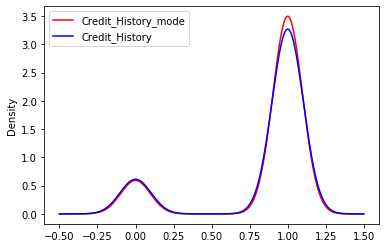

In [27]:
from matplotlib import pyplot as plt
plt.figure()
train_df.Credit_History_mode.plot(kind='kde', color='red', label="Credit_History_mode")
train_df.Credit_History.plot(kind='kde', color='blue', label="Credit_History")
plt.legend()
plt.show()

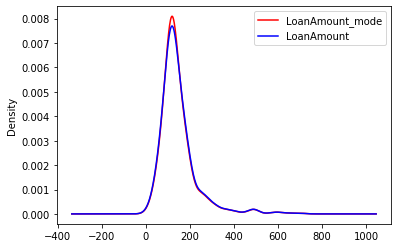

In [29]:
from matplotlib import pyplot as plt
plt.figure()
train_df.LoanAmount_mode.plot(kind='kde', color='red', label="LoanAmount_mode")
train_df.LoanAmount.plot(kind='kde', color='blue', label="LoanAmount")
plt.legend()
plt.show()

In [30]:
for column in empty_features:
    train_df = train_df.drop(column, axis="columns")

In [31]:
train_df.isnull().sum()

Education                0
ApplicantIncome          0
CoapplicantIncome        0
Property_Area            0
Loan_Status              0
Gender_mode              0
Married_mode             0
Dependents_mode          0
Self_Employed_mode       0
LoanAmount_mode          0
Loan_Amount_Term_mode    0
Credit_History_mode      0
dtype: int64

In [32]:
train_df.head()

,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Gender_mode,Married_mode,Dependents_mode,Self_Employed_mode,LoanAmount_mode,Loan_Amount_Term_mode,Credit_History_mode
0,Graduate,5849,0.0,Urban,Y,Male,No,0,No,120.0,360.0,1.0
1,Graduate,4583,1508.0,Rural,N,Male,Yes,1,No,128.0,360.0,1.0
2,Graduate,3000,0.0,Urban,Y,Male,Yes,0,Yes,66.0,360.0,1.0
3,Not Graduate,2583,2358.0,Urban,Y,Male,Yes,0,No,120.0,360.0,1.0
4,Graduate,6000,0.0,Urban,Y,Male,No,0,No,141.0,360.0,1.0


### One Hot Encoding

In [35]:
train_df_2 = pd.get_dummies(train_df, drop_first=True)

In [36]:
train_df_2.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount_mode,Loan_Amount_Term_mode,Credit_History_mode,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Gender_mode_Male,Married_mode_Yes,Dependents_mode_1,Dependents_mode_2,Dependents_mode_3+,Self_Employed_mode_Yes
0,5849,0.0,120.0,360.0,1.0,0,0,1,1,1,0,0,0,0,0
1,4583,1508.0,128.0,360.0,1.0,0,0,0,0,1,1,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,0,1,1,1,1,0,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,1,1,1,0,0,0,0
4,6000,0.0,141.0,360.0,1.0,0,0,1,1,1,0,0,0,0,0
5,5417,4196.0,267.0,360.0,1.0,0,0,1,1,1,1,0,1,0,1
6,2333,1516.0,95.0,360.0,1.0,1,0,1,1,1,1,0,0,0,0
7,3036,2504.0,158.0,360.0,0.0,0,1,0,0,1,1,0,0,1,0
8,4006,1526.0,168.0,360.0,1.0,0,0,1,1,1,1,0,1,0,0
9,12841,10968.0,349.0,360.0,1.0,0,1,0,0,1,1,1,0,0,0


In [37]:
train_df_2.shape

(614, 15)

### Feature Scaling 

In [40]:
columns_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount_mode' ,'Loan_Amount_Term_mode',
                    'Credit_History_mode']

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df_2[columns_to_scale] = scaler.fit_transform(train_df_2[columns_to_scale])

In [42]:
train_df_2.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount_mode,Loan_Amount_Term_mode,Credit_History_mode,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Gender_mode_Male,Married_mode_Yes,Dependents_mode_1,Dependents_mode_2,Dependents_mode_3+,Self_Employed_mode_Yes
0,0.072991,-0.554487,-0.302759,0.273231,0.411733,0,0,1,1,1,0,0,0,0,0
1,-0.134412,-0.038732,-0.207648,0.273231,0.411733,0,0,0,0,1,1,1,0,0,0
2,-0.393747,-0.554487,-0.944757,0.273231,0.411733,0,0,1,1,1,1,0,0,0,1
3,-0.462062,0.251980,-0.302759,0.273231,0.411733,1,0,1,1,1,1,0,0,0,0
4,0.097728,-0.554487,-0.053093,0.273231,0.411733,0,0,1,1,1,0,0,0,0,0
5,0.002218,0.880600,1.444903,0.273231,0.411733,0,0,1,1,1,1,0,1,0,1
6,-0.503019,-0.035995,-0.599981,0.273231,0.411733,1,0,1,1,1,1,0,0,0,0
7,-0.387850,0.301914,0.149017,0.273231,-2.428760,0,1,0,0,1,1,0,0,1,0
8,-0.228939,-0.032575,0.267906,0.273231,0.411733,0,0,1,1,1,1,0,1,0,0
9,1.218457,3.196713,2.419789,0.273231,0.411733,0,1,0,0,1,1,1,0,0,0


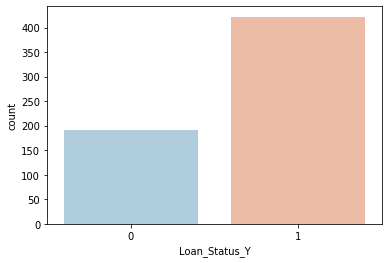

In [43]:
import seaborn as sns
sns.countplot(x='Loan_Status_Y', data=train_df_2, palette='RdBu_r')

### Feature Selection

In [102]:
X = train_df_2.drop("Loan_Status_Y", axis="columns")
Y = train_df_2["Loan_Status_Y"]

In [104]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)

ExtraTreesClassifier()

In [105]:
print(model.feature_importances_)

[0.18618612 0.11975102 0.18781746 0.04893848 0.26983193 0.02275853
 0.02556737 0.02053192 0.02299076 0.02037342 0.02125784 0.01425492
 0.01505744 0.02468282]


In [106]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances

ApplicantIncome            0.186186
CoapplicantIncome          0.119751
LoanAmount_mode            0.187817
Loan_Amount_Term_mode      0.048938
Credit_History_mode        0.269832
Education_Not Graduate     0.022759
Property_Area_Semiurban    0.025567
Property_Area_Urban        0.020532
Gender_mode_Male           0.022991
Married_mode_Yes           0.020373
Dependents_mode_1          0.021258
Dependents_mode_2          0.014255
Dependents_mode_3+         0.015057
Self_Employed_mode_Yes     0.024683
dtype: float64

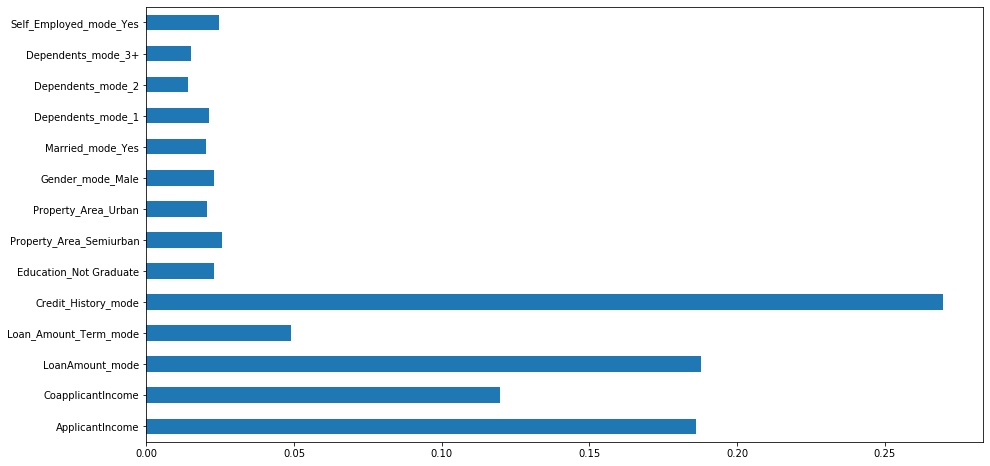

In [107]:
%matplotlib inline
plt.figure(figsize=(15,8))
feature_importances.plot(kind="barh")
plt.show()

## Hyper Parameter tuning and Model Selection

### Logistic Regression

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [109]:
lr_score = cross_val_score(LogisticRegression(), X, Y, cv=10)
lr_score.mean()

0.8079587519830775

### Decision Tree

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = GridSearchCV(DecisionTreeClassifier(), {'criterion':['gini', 'entropy']}, cv=10, return_train_score=False)
clf.fit(X, Y)
clf.cv_results_

{'mean_fit_time': array([0.00680037, 0.00650039]),
 'std_fit_time': array([0.00153637, 0.00080626]),
 'mean_score_time': array([0.00290015, 0.00240018]),
 'std_score_time': array([0.00083067, 0.00048996]),
 'param_criterion': masked_array(data=['gini', 'entropy'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini'}, {'criterion': 'entropy'}],
 'split0_test_score': array([0.66129032, 0.74193548]),
 'split1_test_score': array([0.66129032, 0.67741935]),
 'split2_test_score': array([0.69354839, 0.70967742]),
 'split3_test_score': array([0.61290323, 0.67741935]),
 'split4_test_score': array([0.68852459, 0.68852459]),
 'split5_test_score': array([0.73770492, 0.68852459]),
 'split6_test_score': array([0.78688525, 0.7704918 ]),
 'split7_test_score': array([0.70491803, 0.70491803]),
 'split8_test_score': array([0.60655738, 0.73770492]),
 'split9_test_score': array([0.75409836, 0.72131148]),
 'mean_test_score': array([0.6907720

In [111]:
dt_result_df = pd.DataFrame(clf.cv_results_)
dt_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0068,0.001536,0.0029,0.000831,gini,{'criterion': 'gini'},0.661290,0.661290,0.693548,0.612903,0.688525,0.737705,0.786885,0.704918,0.606557,0.754098,0.690772,0.055279,2
1,0.0065,0.000806,0.0024,0.000490,entropy,{'criterion': 'entropy'},0.741935,0.677419,0.709677,0.677419,0.688525,0.688525,0.770492,0.704918,0.737705,0.721311,0.711793,0.029349,1


In [112]:
dt_result_df[['param_criterion', 'mean_test_score']]

,param_criterion,mean_test_score
0,gini,0.690772
1,entropy,0.711793


### Random Forest Classifier

In [147]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = GridSearchCV(RandomForestClassifier(), {'n_estimators':[1, 5, 10, 20, 40, 50,60]}, cv=10, return_train_score=False)
rf_clf.fit(X, Y)
rf_clf.cv_results_

{'mean_fit_time': array([0.00710046, 0.01450081, 0.02340121, 0.04400208, 0.09290512,
        0.11850593, 0.12170579]),
 'std_fit_time': array([0.00144577, 0.00067081, 0.00168551, 0.00252966, 0.01136261,
        0.0226387 , 0.00110009]),
 'mean_score_time': array([0.0042002 , 0.00330026, 0.00360014, 0.00430028, 0.00780048,
        0.00890052, 0.00890048]),
 'std_score_time': array([0.0020882 , 0.00045821, 0.00128071, 0.00148673, 0.00140008,
        0.00157796, 0.00030011]),
 'param_n_estimators': masked_array(data=[1, 5, 10, 20, 40, 50, 60],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 1},
  {'n_estimators': 5},
  {'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 40},
  {'n_estimators': 50},
  {'n_estimators': 60}],
 'split0_test_score': array([0.62903226, 0.79032258, 0.75806452, 0.79032258, 0.77419355,
        0.80645161, 0.79032258]),
 'split1_test_score': array([0.

In [148]:
rf_result_df = pd.DataFrame(rf_clf.cv_results_)
rf_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007100,0.001446,0.004200,0.002088,1,{'n_estimators': 1},0.629032,0.645161,0.774194,0.693548,0.721311,0.688525,0.590164,0.704918,0.704918,0.639344,0.679112,0.050600,7
1,0.014501,0.000671,0.003300,0.000458,5,{'n_estimators': 5},0.790323,0.758065,0.693548,0.677419,0.770492,0.786885,0.836066,0.770492,0.754098,0.836066,0.767345,0.049162,4
2,0.023401,0.001686,0.003600,0.001281,10,{'n_estimators': 10},0.758065,0.758065,0.693548,0.725806,0.704918,0.770492,0.836066,0.754098,0.704918,0.803279,0.750925,0.043175,6
3,0.044002,0.002530,0.004300,0.001487,20,{'n_estimators': 20},0.790323,0.790323,0.709677,0.725806,0.754098,0.819672,0.786885,0.786885,0.737705,0.770492,0.767187,0.032669,5
4,0.092905,0.011363,0.007800,0.001400,40,{'n_estimators': 40},0.774194,0.774194,0.758065,0.725806,0.754098,0.786885,0.819672,0.803279,0.786885,0.836066,0.781914,0.030779,3
5,0.118506,0.022639,0.008901,0.001578,50,{'n_estimators': 50},0.806452,0.774194,0.741935,0.741935,0.770492,0.786885,0.852459,0.803279,0.770492,0.819672,0.786779,0.032811,1
6,0.121706,0.001100,0.008900,0.000300,60,{'n_estimators': 60},0.790323,0.774194,0.693548,0.741935,0.754098,0.786885,0.852459,0.803279,0.803279,0.836066,0.783607,0.043736,2


In [149]:
rf_result_df[['param_n_estimators', 'mean_test_score']]

,param_n_estimators,mean_test_score
0,1,0.679112
1,5,0.767345
2,10,0.750925
3,20,0.767187
4,40,0.781914
5,50,0.786779
6,60,0.783607


### SVM

In [116]:
from sklearn.svm import SVC
svm_clf = GridSearchCV(SVC(), {'C': [1,10,20], 'kernel': ['rbf','linear']}, cv=10, return_train_score=False)
svm_clf.fit(X, Y)
svm_clf.cv_results_

{'mean_fit_time': array([0.01640084, 0.00830047, 0.01810091, 0.02180121, 0.02040112,
        0.035602  ]),
 'std_fit_time': array([0.00332288, 0.00089997, 0.00070004, 0.00340012, 0.00111357,
        0.00678569]),
 'mean_score_time': array([0.00330024, 0.00260022, 0.00310028, 0.0025002 , 0.00290024,
        0.00240011]),
 'std_score_time': array([0.00090001, 0.0004899 , 0.00053861, 0.00049996, 0.00030005,
        0.00091656]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [117]:
svm_result_df = pd.DataFrame(svm_clf.cv_results_)
svm_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016401,0.003323,0.0033,0.000900,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.806452,0.822581,0.790323,0.741935,0.786885,0.786885,0.852459,0.852459,0.770492,0.836066,0.804654,0.034379,4
1,0.008300,0.000900,0.0026,0.000490,1,linear,"{'C': 1, 'kernel': 'linear'}",0.806452,0.822581,0.774194,0.758065,0.786885,0.786885,0.868852,0.852459,0.803279,0.836066,0.809572,0.033478,1
2,0.018101,0.000700,0.0031,0.000539,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.806452,0.822581,0.709677,0.709677,0.786885,0.786885,0.836066,0.819672,0.737705,0.819672,0.783527,0.045226,5
3,0.021801,0.003400,0.0025,0.000500,10,linear,"{'C': 10, 'kernel': 'linear'}",0.806452,0.822581,0.774194,0.758065,0.786885,0.786885,0.868852,0.852459,0.803279,0.836066,0.809572,0.033478,1
4,0.020401,0.001114,0.0029,0.000300,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.806452,0.822581,0.709677,0.725806,0.770492,0.786885,0.819672,0.786885,0.688525,0.819672,0.773665,0.046577,6
5,0.035602,0.006786,0.0024,0.000917,20,linear,"{'C': 20, 'kernel': 'linear'}",0.806452,0.822581,0.774194,0.758065,0.786885,0.786885,0.868852,0.852459,0.803279,0.836066,0.809572,0.033478,1


In [118]:
svm_result_df[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.804654
1,1,linear,0.809572
2,10,rbf,0.783527
3,10,linear,0.809572
4,20,rbf,0.773665
5,20,linear,0.809572


### Naives Bayes

In [119]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GridSearchCV(GaussianNB(),{}, cv=10, return_train_score=False)
nb_clf.fit(X, Y)
nb_clf.cv_results_

{'mean_fit_time': array([0.0061003]),
 'std_fit_time': array([0.00170017]),
 'mean_score_time': array([0.00310023]),
 'std_score_time': array([0.00175798]),
 'params': [{}],
 'split0_test_score': array([0.77419355]),
 'split1_test_score': array([0.82258065]),
 'split2_test_score': array([0.72580645]),
 'split3_test_score': array([0.74193548]),
 'split4_test_score': array([0.7704918]),
 'split5_test_score': array([0.7704918]),
 'split6_test_score': array([0.83606557]),
 'split7_test_score': array([0.81967213]),
 'split8_test_score': array([0.7704918]),
 'split9_test_score': array([0.86885246]),
 'mean_test_score': array([0.79005817]),
 'std_test_score': array([0.04254904]),
 'rank_test_score': array([1])}

In [120]:
nb_result_df = pd.DataFrame(nb_clf.cv_results_)
nb_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0061,0.0017,0.0031,0.001758,{},0.774194,0.822581,0.725806,0.741935,0.770492,0.770492,0.836066,0.819672,0.770492,0.868852,0.790058,0.042549,1


In [121]:
nb_result_df[['mean_test_score']]

,mean_test_score
0,0.790058


### KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = GridSearchCV(KNeighborsClassifier(),{"n_neighbors":[1, 3, 5, 7, 9, 10, 12, 13, 14, 16, 20, 23, 25, 28, 30]}, cv=12, return_train_score=False)
knn_clf.fit(X, Y)
knn_clf.cv_results_

{'mean_fit_time': array([0.00691706, 0.00500027, 0.00541695, 0.00541705, 0.00425013,
        0.00675005, 0.00825042, 0.00591699, 0.00541693, 0.00516695,
        0.00550038, 0.00525033, 0.00525033, 0.00516695, 0.00500027]),
 'std_fit_time': array([1.89126776e-03, 1.77706717e-07, 4.93004535e-04, 4.93041476e-04,
        3.46713398e-03, 4.22541732e-03, 1.42164234e-03, 7.59152145e-04,
        4.93021318e-04, 3.72730997e-04, 5.00023391e-04, 4.32935453e-04,
        4.32889584e-04, 5.52820619e-04, 1.48680106e-07]),
 'mean_score_time': array([0.00666706, 0.00525035, 0.00533364, 0.0055003 , 0.00658349,
        0.00483344, 0.00716708, 0.00983391, 0.00591701, 0.00558366,
        0.00558362, 0.00566699, 0.00566699, 0.00583363, 0.00575034]),
 'std_score_time': array([0.00205494, 0.00043297, 0.00047147, 0.00050002, 0.00330296,
        0.00524149, 0.00177179, 0.0014044 , 0.00027631, 0.00049303,
        0.00064007, 0.00047143, 0.00047147, 0.00037276, 0.00043296]),
 'param_n_neighbors': masked_array(dat

In [123]:
knn_results_df = pd.DataFrame(knn_clf.cv_results_)
knn_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006917,1.891268e-03,0.006667,0.002055,1,{'n_neighbors': 1},0.769231,0.788462,0.764706,0.803922,...,0.647059,0.764706,0.686275,0.745098,0.725490,0.784314,0.647059,0.739285,0.050738,15
1,0.005000,1.777067e-07,0.005250,0.000433,3,{'n_neighbors': 3},0.788462,0.826923,0.764706,0.803922,...,0.784314,0.725490,0.823529,0.745098,0.705882,0.803922,0.705882,0.766968,0.042500,14
2,0.005417,4.930045e-04,0.005334,0.000471,5,{'n_neighbors': 5},0.788462,0.865385,0.745098,0.823529,...,0.764706,0.764706,0.823529,0.803922,0.705882,0.803922,0.784314,0.784879,0.041258,13
3,0.005417,4.930415e-04,0.005500,0.000500,7,{'n_neighbors': 7},0.807692,0.865385,0.725490,0.784314,...,0.745098,0.784314,0.823529,0.823529,0.784314,0.823529,0.803922,0.794652,0.036762,11
4,0.004250,3.467134e-03,0.006583,0.003303,9,{'n_neighbors': 9},0.788462,0.846154,0.745098,0.784314,...,0.764706,0.823529,0.823529,0.843137,0.784314,0.823529,0.803922,0.797983,0.033563,10
5,0.006750,4.225417e-03,0.004833,0.005241,10,{'n_neighbors': 10},0.788462,0.865385,0.745098,0.784314,...,0.764706,0.823529,0.823529,0.843137,0.764706,0.803922,0.803922,0.793049,0.042266,12
6,0.008250,1.421642e-03,0.007167,0.001772,12,{'n_neighbors': 12},0.807692,0.865385,0.764706,0.784314,...,0.784314,0.823529,0.843137,0.803922,0.823529,0.803922,0.784314,0.802822,0.031932,9
7,0.005917,7.591521e-04,0.009834,0.001404,13,{'n_neighbors': 13},0.807692,0.865385,0.764706,0.784314,...,0.784314,0.784314,0.823529,0.823529,0.823529,0.843137,0.823529,0.806090,0.032867,7
8,0.005417,4.930213e-04,0.005917,0.000276,14,{'n_neighbors': 14},0.807692,0.865385,0.764706,0.784314,...,0.784314,0.784314,0.823529,0.803922,0.823529,0.843137,0.803922,0.804456,0.029332,8
9,0.005167,3.727310e-04,0.005584,0.000493,16,{'n_neighbors': 16},0.807692,0.846154,0.764706,0.784314,...,0.784314,0.784314,0.823529,0.823529,0.823529,0.843137,0.823529,0.806121,0.027454,6


In [124]:
knn_results_df[["param_n_neighbors", "mean_test_score" ]]

,param_n_neighbors,mean_test_score
0,1,0.739285
1,3,0.766968
2,5,0.784879
3,7,0.794652
4,9,0.797983
5,10,0.793049
6,12,0.802822
7,13,0.806090
8,14,0.804456
9,16,0.806121


### Import the test dataset

In [83]:
test_df = pd.read_csv("E:\\Data Science\\Analytics Vidhya Datasets\\Loan_test.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [84]:
loan_id_df = test_df["Loan_ID"]

In [85]:
test_df = test_df.drop("Loan_ID", axis="columns")

In [86]:
test_df.shape

(367, 11)

In [87]:
test_empty_features = [col for col in test_df.columns if (test_df[col].isnull().sum())!=0]
test_empty_features

['Gender',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [89]:
for col in test_empty_features:
    test_df[col+"_mode"] = test_df[col].fillna(test_df[col].mode()[0])

In [90]:
for column in test_empty_features:
    test_df = test_df.drop(column, axis="columns")

In [91]:
test_df.isnull().sum()

Married                  0
Education                0
ApplicantIncome          0
CoapplicantIncome        0
Property_Area            0
Gender_mode              0
Dependents_mode          0
Self_Employed_mode       0
LoanAmount_mode          0
Loan_Amount_Term_mode    0
Credit_History_mode      0
dtype: int64

In [92]:
test_df_2 = pd.get_dummies(test_df, drop_first=True)

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_df_2 = scaler.fit_transform(test_df_2)

### KNN

In [125]:
knn_model = KNeighborsClassifier( n_neighbors=23)
knn_model.fit(X, Y)
knn_prediction = knn_model.predict(test_df_2)
knn_loan_status = pd.DataFrame(knn_prediction, columns=["Loan_Status"])
Final_Prediction_df_knn = pd.concat([loan_id_df, knn_loan_status], axis="columns")
Final_Prediction_df_knn.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [126]:
Final_Prediction_df_knn["Loan_Status"] = Final_Prediction_df_knn["Loan_Status"].map({1:"Y", 0:"N"})

In [127]:
Final_Prediction_df_knn.to_csv("E:\Data Science\Jupyter_Notebook_Ex\ML_Projects\Prediction_knn_2.csv", index=False)

### Logistic Regression

In [128]:
lr_model = LogisticRegression()
lr_model.fit(X, Y)

LogisticRegression()

In [129]:
lr_prediction = lr_model.predict(test_df_2)

In [130]:
lr_loan_status = pd.DataFrame(lr_prediction, columns=["Loan_Status"])

In [131]:
Final_Prediction_df_lr = pd.concat([loan_id_df, lr_loan_status], axis="columns")

In [132]:
Final_Prediction_df_lr["Loan_Status"] = Final_Prediction_df_lr["Loan_Status"].map({1:"Y", 0:"N"})

In [133]:
Final_Prediction_df_lr.to_csv("E:\Data Science\Jupyter_Notebook_Ex\ML_Projects\Prediction_lr_2.csv", index=False)

### using SVM

In [141]:
model =SVC(C=10, kernel='linear')
model.fit(X, Y)

SVC(C=10, kernel='linear')

In [142]:
prediction = model.predict(test_df_2)

In [143]:
loan_status = pd.DataFrame(prediction, columns=["Loan_Status"])

In [144]:
Final_Prediction_df = pd.concat([loan_id_df, loan_status], axis="columns")

In [145]:
Final_Prediction_df["Loan_Status"] = Final_Prediction_df["Loan_Status"].map({1:"Y", 0:"N"})

In [146]:
Final_Prediction_df.to_csv("E:\Data Science\Jupyter_Notebook_Ex\ML_Projects\svm_2.csv", index=False)

### Random_Forest

In [150]:
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(X, Y)

RandomForestClassifier(n_estimators=50)

In [151]:
rf_prediction = rf_model.predict(test_df_2)

In [152]:
rf_loan_status = pd.DataFrame(rf_prediction, columns=["Loan_Status"])

In [153]:
Final_Prediction_df_rf = pd.concat([loan_id_df, rf_loan_status], axis="columns")

In [154]:
Final_Prediction_df_rf["Loan_Status"] = Final_Prediction_df_rf["Loan_Status"].map({1:"Y", 0:"N"})

In [155]:
Final_Prediction_df_rf.to_csv("E:\Data Science\Jupyter_Notebook_Ex\ML_Projects\Prediction_rf_2.csv", index=False)

### Naives Bayes

In [157]:
nb_model =GaussianNB()
nb_model.fit(X, Y)

GaussianNB()

In [158]:
nb_prediction = nb_model.predict(test_df_2)

In [159]:
nb_loan_status = pd.DataFrame(nb_prediction, columns=["Loan_Status"])

In [160]:
Final_Prediction_df_nb = pd.concat([loan_id_df, nb_loan_status], axis="columns")

In [161]:
Final_Prediction_df_nb["Loan_Status"] = Final_Prediction_df_nb["Loan_Status"].map({1:"Y", 0:"N"})

In [162]:
Final_Prediction_df_nb.to_csv("E:\Data Science\Jupyter_Notebook_Ex\ML_Projects\Prediction_nb_2.csv", index=False)